In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; 
import os
from scipy.stats import norm, probplot
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
c:\Users\User\Downloads\Projeto2_CDados-master\Projeto2_CDados-master


In [25]:
def regress(X,Y):
    '''
    X: coluna(s) do DataFrame que serão utilizadas como variável(is) preditoras/explicativas (independente(s))
    Y: coluna do DataFrame que será utilizada como variável resposta (dependente)
    '''
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results

In [4]:
dados = pd.read_csv('drinks.csv')
temp = pd.read_excel('temp.xlsx')
gdp = pd.read_excel('gdp_percapita.xlsx')
water = pd.read_excel('water.xlsx')
ratio = pd.read_excel('sex_ratio.xlsx')
dados

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9
5,Antigua & Barbuda,102,128,45,4.9
6,Argentina,193,25,221,8.3
7,Armenia,21,179,11,3.8
8,Australia,261,72,212,10.4
9,Austria,279,75,191,9.7


In [6]:
mergedTemp = pd.merge(dados, temp, on=['country'], how='left')
mergedRatio = pd.merge(mergedTemp, ratio, on=['country'], how='left')
mergedGdp = pd.merge(mergedRatio, gdp, on=['country'], how='left')
mergedWater = pd.merge(mergedGdp, water, on=['country'], how='left')
drop_reps = mergedWater.drop_duplicates(subset=None, keep='first', inplace=False)
final = drop_reps.dropna(inplace = False)
final

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,temperature,ratio,gdp,water
0,Afghanistan,0,0,0,0.0,16.0,105.0,5.1700,0.484
1,Albania,89,132,54,4.9,14.0,102.0,2.9800,0.878
2,Algeria,25,0,14,0.7,25.0,102.0,2.0600,0.924
4,Angola,217,57,45,5.9,23.0,97.8,0.5940,0.504
6,Argentina,193,25,221,8.3,15.0,94.8,7.9400,0.985
7,Armenia,21,179,11,3.8,12.0,87.9,1.1900,0.983
8,Australia,261,72,212,10.4,22.0,100.0,1.4400,0.999
9,Austria,279,75,191,9.7,7.0,95.1,1.7500,1.000
10,Azerbaijan,21,46,5,1.3,14.0,98.2,3.7900,0.866
11,Bahamas,122,176,51,6.3,25.0,94.0,-0.9280,0.987


In [8]:
final.describe()


,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,temperature,ratio,gdp,water
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,109.427673,77.666667,51.540881,4.797484,19.761006,102.233962,3.101004,0.844792
std,103.402951,83.291517,82.954673,3.801115,8.664243,25.416423,3.928260,0.185186
min,0.000000,0.000000,0.000000,0.000000,-15.000000,84.500000,-5.220000,0.330000
25%,20.000000,5.500000,1.000000,1.300000,13.000000,96.100000,0.951000,0.739500
50%,77.000000,60.000000,8.000000,4.400000,23.000000,98.600000,2.740000,0.928000
75%,192.500000,120.000000,59.000000,7.450000,27.000000,102.000000,5.035000,0.987000
max,376.000000,438.000000,370.000000,14.400000,30.000000,325.000000,22.800000,1.000000


In [10]:
final.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
temperature                     float64
ratio                           float64
gdp                             float64
water                           float64
dtype: object

In [12]:
correlacao = final.corr()
correlacao

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,temperature,ratio,gdp,water
beer_servings,1.000000,0.451152,0.537005,0.836485,-0.493861,-0.201302,-0.070865,0.447015
spirit_servings,0.451152,1.000000,0.188370,0.628314,-0.339432,-0.088488,-0.045759,0.414198
wine_servings,0.537005,0.188370,1.000000,0.670542,-0.571680,-0.122328,-0.198738,0.407489
total_litres_of_pure_alcohol,0.836485,0.628314,0.670542,1.000000,-0.579624,-0.210244,-0.105340,0.400734
temperature,-0.493861,-0.339432,-0.571680,-0.579624,1.000000,0.230799,0.076927,-0.415336
ratio,-0.201302,-0.088488,-0.122328,-0.210244,0.230799,1.000000,0.108237,0.081587
gdp,-0.070865,-0.045759,-0.198738,-0.105340,0.076927,0.108237,1.000000,-0.049227
water,0.447015,0.414198,0.407489,0.400734,-0.415336,0.081587,-0.049227,1.000000


Text(0, 0.5, 'Temperatura Média')

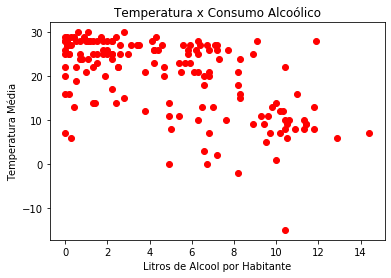

In [14]:
plt.scatter(final.total_litres_of_pure_alcohol, final.temperature, c = 'red')
plt.title('Temperatura x Consumo Alcoólico')
plt.xlabel('Litros de Alcool por Habitante')
plt.ylabel('Temperatura Média')

Text(0, 0.5, 'PIB per capta')

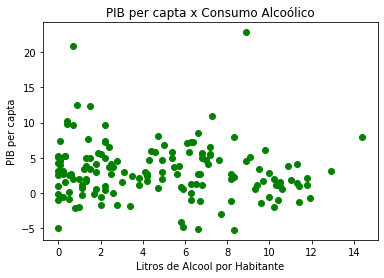

In [16]:
plt.scatter(final.total_litres_of_pure_alcohol, final.gdp, c='green')
plt.title('PIB per capta x Consumo Alcoólico')
plt.xlabel('Litros de Alcool por Habitante')
plt.ylabel('PIB per capta')

Text(0, 0.5, 'Relação Homens/Mulheres')

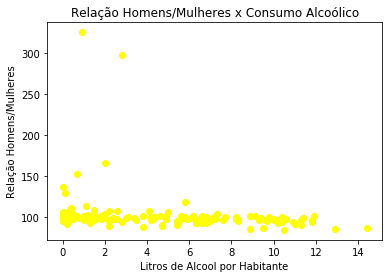

In [18]:
plt.scatter(final.total_litres_of_pure_alcohol, final.ratio, c='yellow')
plt.title('Relação Homens/Mulheres x Consumo Alcoólico')
plt.xlabel('Litros de Alcool por Habitante')
plt.ylabel('Relação Homens/Mulheres')

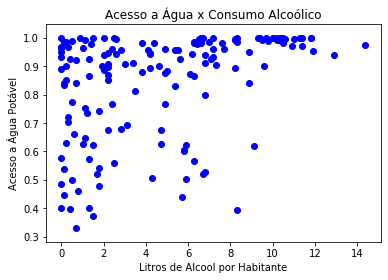

In [20]:
plt.scatter(final.total_litres_of_pure_alcohol, final.water, c='blue')
plt.title('Acesso a Água x Consumo Alcoólico')
plt.xlabel('Litros de Alcool por Habitante')
plt.ylabel('Acesso a Água Potável')
plt.show()

In [23]:
X = final[['temperature', 'ratio', 'gdp', 'water']]
Y = final['total_litres_of_pure_alcohol']

In [28]:
results = regress(X,Y)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     total_litres_of_pure_alcohol   R-squared:                       0.383
Model:                                      OLS   Adj. R-squared:                  0.367
Method:                           Least Squares   F-statistic:                     23.85
Date:                          Fri, 05 Jun 2020   Prob (F-statistic):           2.29e-15
Time:                                  00:06:33   Log-Likelihood:                -399.09
No. Observations:                           159   AIC:                             808.2
Df Residuals:                               154   BIC:                             823.5
Df Model:                                     4                                         
Covariance Type:                      nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.9329      1.685      4.114      0.000       3.604      10.262
temperature    -0.2012      0.032     -6.300      0.000      -0.264      -0.138
ratio          -0.0175      0.010     -1.754      0.081      -0.037       0.002
gdp            -0.0452      0.062     -0.731      0.466      -0.167       0.077
water           4.4639      1.459      3.059      0.003       1.581       7.347
==============================================================================
Omnibus:                        1.029   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.598   Jarque-Bera (JB):                1.028
Skew:                           0.060   Prob(JB):                        0.598
Kurtosis:                       2.625   Cond. No.                         941.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""